1) Bùi Văn Thống - 52100934
2) Trần Văn Phát - 52100909
3) Nguyễn Minh Phú - 52100920

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng quan dữ liệu
Tập dữ liệu được lưu trữ trong tệp CSV và bao gồm các cột bổ sung như thời gian tính bằng giờ, ngày, ngày trong tuần và số lượng cho từng loại phương tiện (CarCount, BikeCount, BusCount, TruckCount). Cột "Tổng" biểu thị tổng số lượng tất cả các loại phương tiện được phát hiện trong khoảng thời gian 15 phút.

In [3]:
data = pd.read_csv('./TrafficTwoMonth.csv')

Famililarize with the Data

In [4]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [6]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [7]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

## Exploratory Data Analysis

Dưới đây là biểu đồ phân bố tần suất lưu lượng giao thông của feature "Day of week"

<Axes: xlabel='Day of the week', ylabel='Count'>

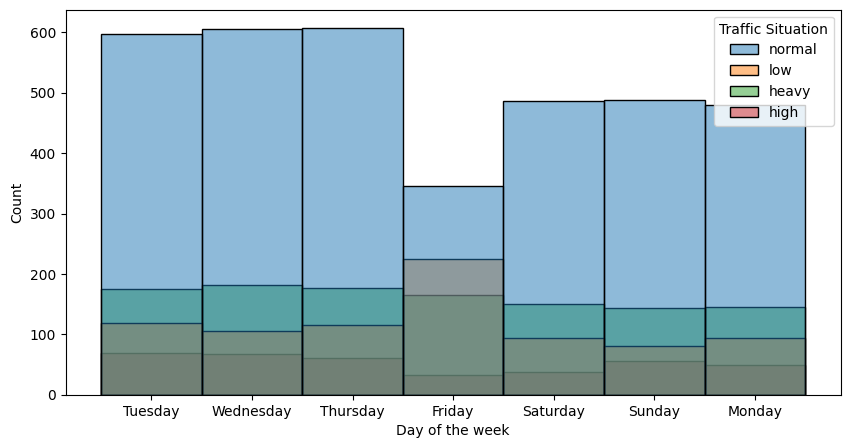

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Day of the week", hue="Traffic Situation")

Dưới đây là biểu đồ phân bố tần suất lưu lượng giao thông của feature "Date"

<Axes: xlabel='Date', ylabel='Count'>

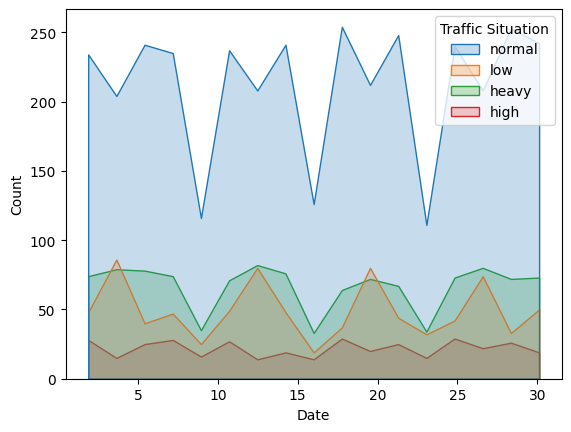

In [9]:
sns.histplot(data, x="Date", hue="Traffic Situation", element="poly")

Dưới đây là biểu đồ phân bố tần suất lưu lượng giao thông của feature "Total"

<Axes: xlabel='Total', ylabel='Count'>

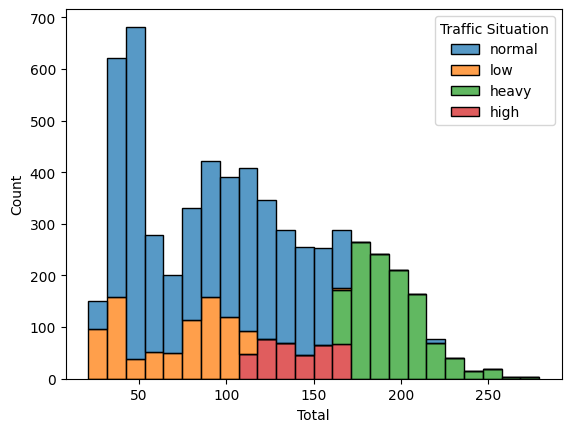

In [10]:
sns.histplot(data=data, x="Total", hue="Traffic Situation", multiple="stack")

Dưới là Biểu đồ hiển thị các đường iso-contour, cho biết các vùng có mật độ xác suất lưu lượng giao thông dựa trên feature "CarCount","Total"

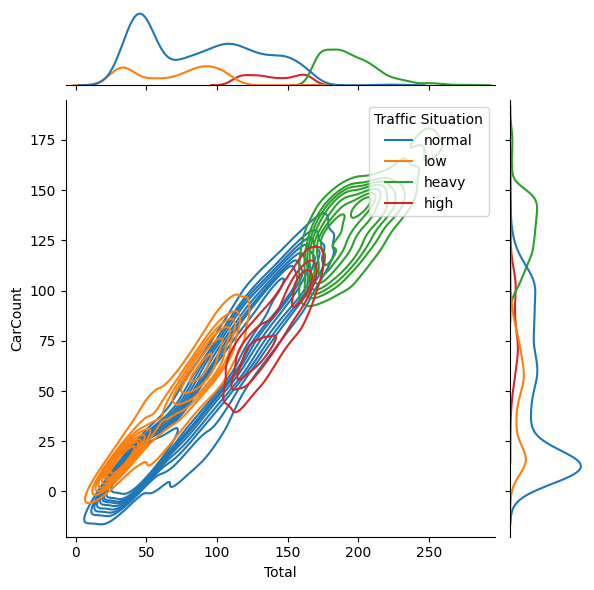

In [11]:
sns.jointplot(data=data, x="Total", y="CarCount", hue="Traffic Situation", kind="kde")

Dưới là biểu đồ phân tán mật độ lưu lượng giao thông với feature "TruckCount","Total"

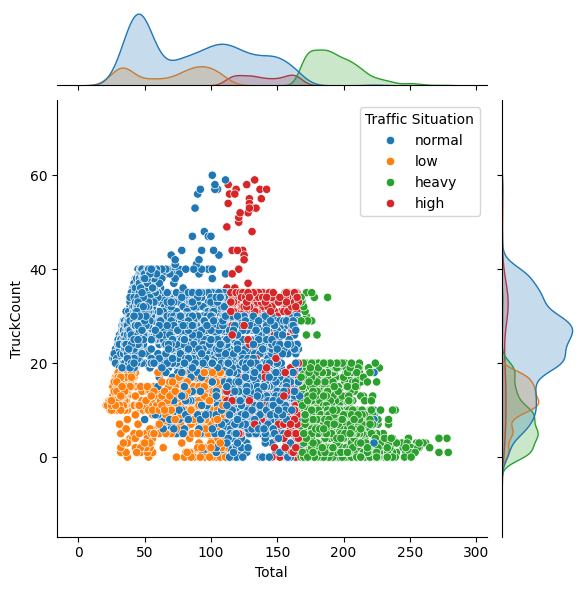

In [12]:
sns.jointplot(data=data, x="Total", y="TruckCount",hue="Traffic Situation")

In [13]:
#Converting target variable 'Traffic Situation' into Numeric form
data['Traffic Situation'] = data['Traffic Situation'].replace({'low':0, 'normal':1, 
                                                              'heavy':2, 'high':3})

In [14]:
#Dealing with 'Day of the week' feature
data['Day of the week'].value_counts()

Day of the week
Tuesday      960
Wednesday    960
Thursday     960
Friday       768
Saturday     768
Sunday       768
Monday       768
Name: count, dtype: int64

In [15]:
#Converting Days of weak into Numeric form
data['Day of the week'] = data['Day of the week'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})

In [16]:
test_temp = data.copy()

In [17]:
#Extracting Specific time-related information from 'Time(24:00 am/pm)' column

data['hour'] = pd.to_datetime(data['Time']).dt.hour #Hour in separate column
data['minute'] = pd.to_datetime(data['Time']).dt.minute #Minute in separate column


# replace 0 with AM
# replace 1 with PM

data['Temp'] = data['Time'].apply(lambda x: x.split(' ')[1]) #Temporary column for AM/PM
data['AM/PM'] = data['Temp'].replace({'AM':0,'PM':1})

C:\Users\DELL\AppData\Local\Temp\ipykernel_17172\4231077955.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hour'] = pd.to_datetime(data['Time']).dt.hour #Hour in separate column
C:\Users\DELL\AppData\Local\Temp\ipykernel_17172\4231077955.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['minute'] = pd.to_datetime(data['Time']).dt.minute #Minute in separate column


In [18]:
#Now remove 'Temp' and 'Time' columns
data= data.drop(columns = ['Time','Temp'], axis=1)
data

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
0,10,2,13,2,2,24,41,1,0,0,0
1,10,2,14,1,1,36,52,1,0,15,0
2,10,2,10,2,2,32,46,1,0,30,0
3,10,2,10,2,2,36,50,1,0,45,0
4,10,2,11,2,1,34,48,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5947,9,4,16,3,1,36,56,1,22,45,1
5948,9,4,11,0,1,30,42,1,23,0,1
5949,9,4,15,4,1,25,45,1,23,15,1
5950,9,4,16,5,0,27,48,1,23,30,1


Correlations using HeatMap

In [19]:
data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minute,AM/PM,Traffic Situation
Date,1.000000e+00,-1.579937e-02,-0.010331,0.000606,-0.003638,0.020669,-0.004893,9.879799e-17,1.235173e-16,1.155847e-16,0.002888
Day of the week,-1.579937e-02,1.000000e+00,0.000756,0.042691,-0.040217,-0.003194,-0.000201,-3.449991e-17,-1.641041e-17,-1.017140e-16,-0.018438
CarCount,-1.033127e-02,7.563311e-04,1.000000,0.708243,0.658417,-0.615043,0.971507,1.538399e-01,-4.548948e-03,1.085476e-01,0.519542
BikeCount,6.056798e-04,4.269059e-02,0.708243,1.000000,0.577671,-0.607720,0.781879,1.179204e-01,1.009466e-03,1.036435e-01,0.400520
BusCount,-3.637580e-03,-4.021672e-02,0.658417,0.577671,1.000000,-0.558372,0.758970,1.816036e-01,-1.806164e-02,1.585635e-01,0.579169
TruckCount,2.066869e-02,-3.193844e-03,-0.615043,-0.607720,-0.558372,1.000000,-0.545390,-2.657474e-02,9.183040e-03,1.577175e-03,-0.052573
Total,-4.893004e-03,-2.010411e-04,0.971507,0.781879,0.758970,-0.545390,1.000000,1.825624e-01,-5.658909e-03,1.437998e-01,0.616679
hour,9.879799e-17,-3.449991e-17,0.153840,0.117920,0.181604,-0.026575,0.182562,1.000000e+00,6.170054e-18,8.667781e-01,0.126384
minute,1.235173e-16,-1.641041e-17,-0.004549,0.001009,-0.018062,0.009183,-0.005659,6.170054e-18,1.000000e+00,8.328502e-18,-0.000304
AM/PM,1.155847e-16,-1.017140e-16,0.108548,0.103644,0.158564,0.001577,0.143800,8.667781e-01,8.328502e-18,1.000000e+00,0.113082


<Axes: >

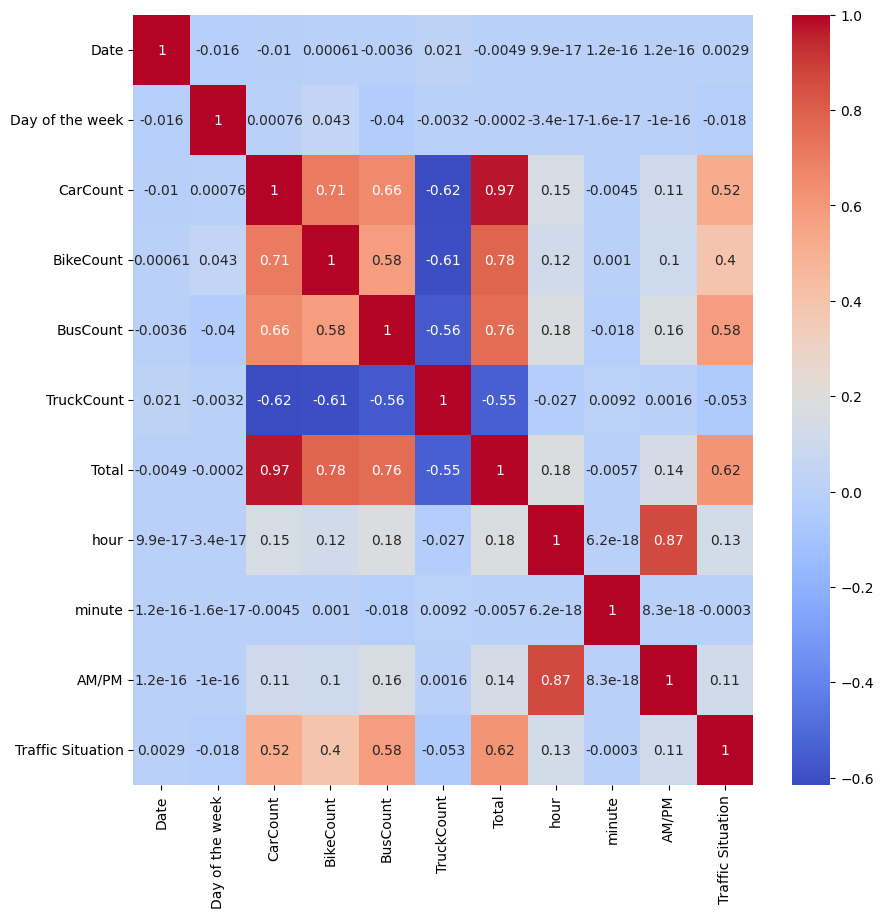

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
           'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr(),
            cmap="coolwarm",annot=True)